In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [103]:
df=pd.read_csv('Mall_Customers.csv')

In [104]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [105]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [107]:
df1=df.drop('CustomerID',axis='columns')

In [108]:
df1

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [109]:
df1.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [110]:
df1.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

C:\Users\Humaina\AppData\Local\Temp\ipykernel_10624\4224662892.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[x],bins=20)
C:\Users\Humaina\AppData\Local\Temp\ipykernel_10624\4224662892.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[x],bins=20)
C:\Users\Humaina\AppData\Local\Tem

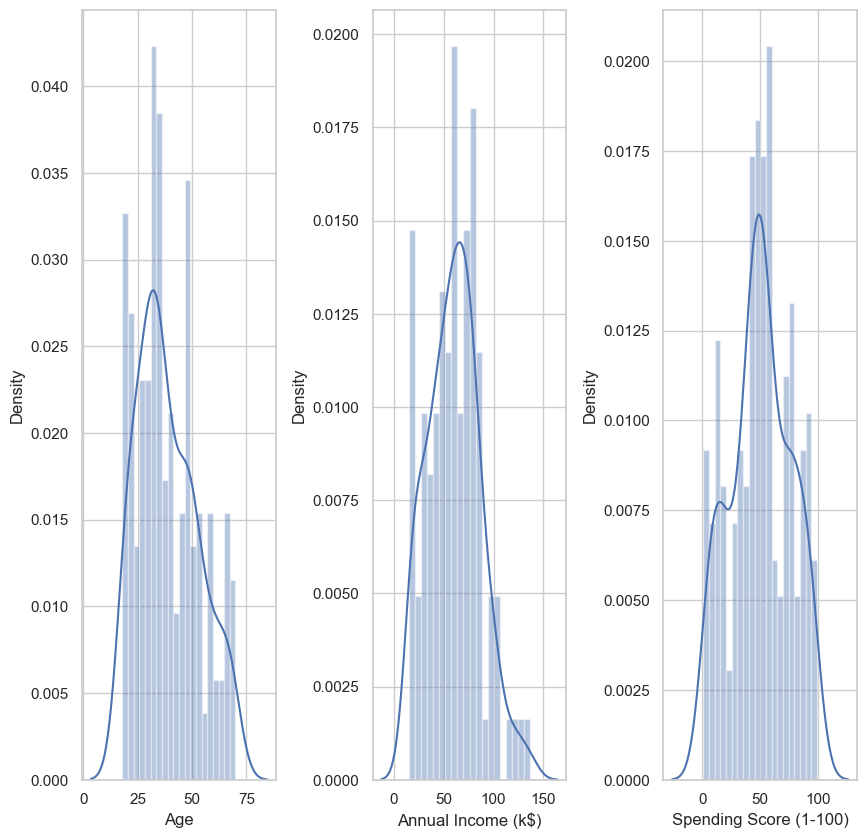

In [111]:
plt.figure(1,figsize=(10,10))
n=0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(df1[x],bins=20)
    
plt.show()    

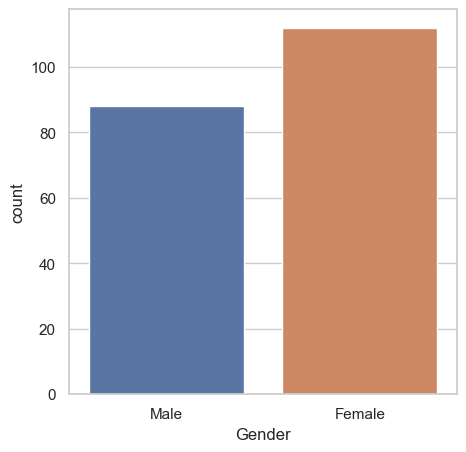

In [112]:
plt.figure(figsize=(5,5))
sns.countplot(x='Gender',data=df1)
plt.show()

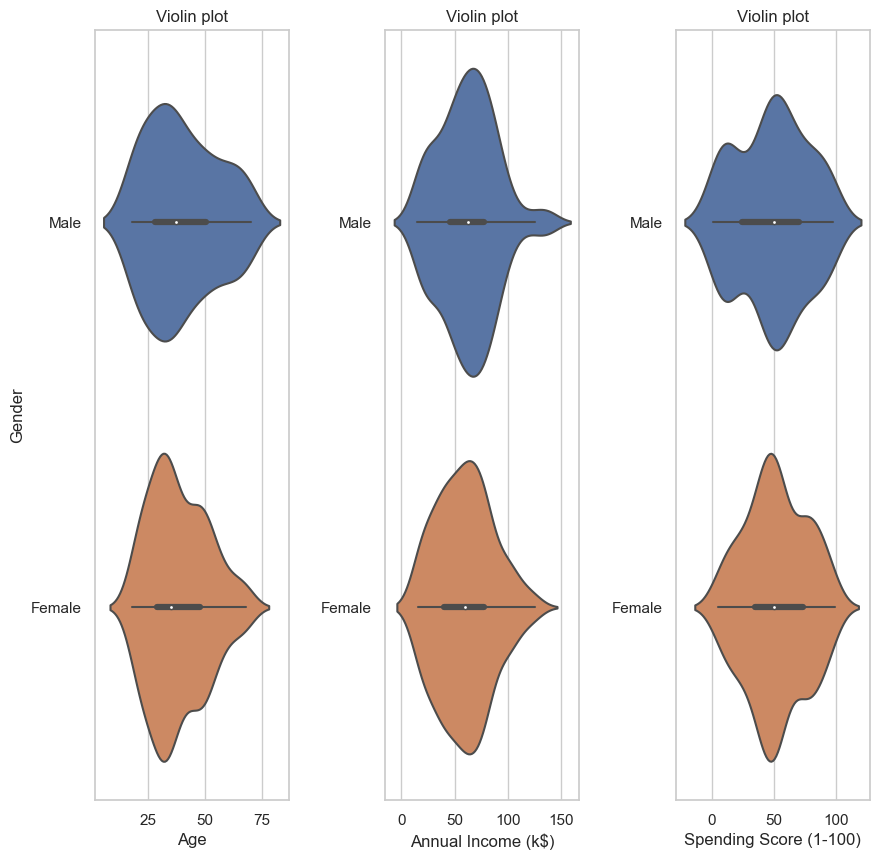

In [113]:
plt.figure(1,figsize=(10,10))
n=0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=x,y='Gender',data=df1)
    plt.ylabel("Gender" if n==1 else '')
    plt.title("Violin plot")
    
plt.show()

In [114]:
Age_18_25=df1.Age[(df1.Age>=18)&(df1.Age<=25)]
Age_26_35=df1.Age[(df1.Age>=26)&(df1.Age<=35)]
Age_36_45=df1.Age[(df1.Age>=36)&(df1.Age<=45)]
Age_46_55=df1.Age[(df1.Age>=46)&(df1.Age<=55)]
Age_56_65=df1.Age[(df1.Age>=56)&(df1.Age<=65)]
Age_66_70=df1.Age[(df1.Age>=66)&(df1.Age<=70)]

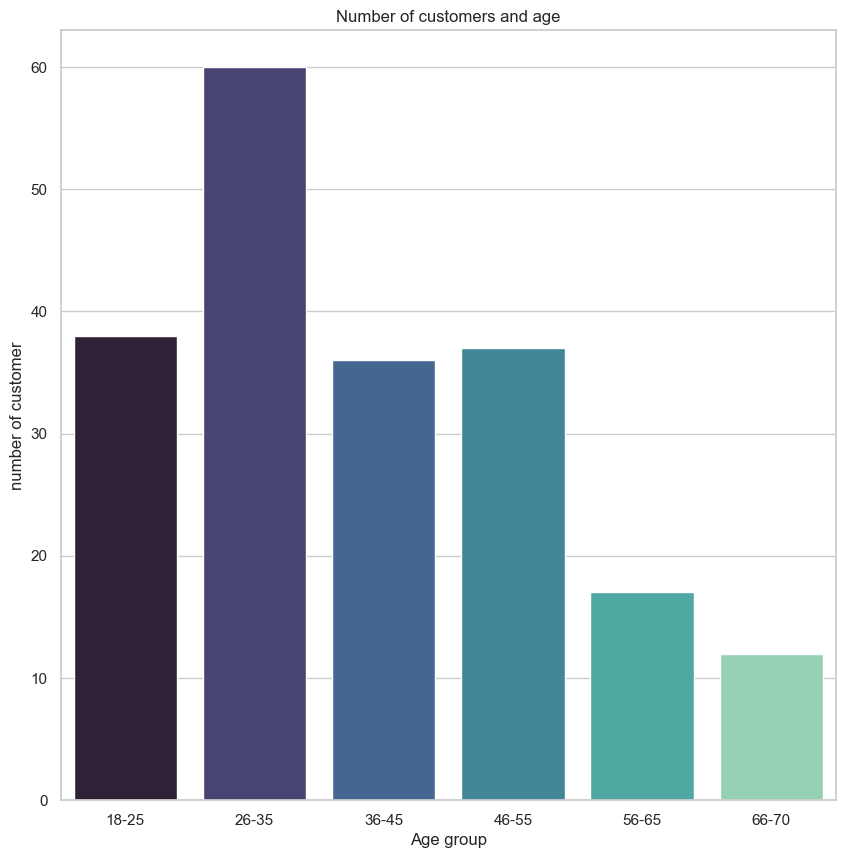

In [115]:
xage=['18-25','26-35','36-45','46-55','56-65','66-70']
yage=[len(Age_18_25.values),len(Age_26_35.values),len(Age_36_45.values),len(Age_46_55.values),len(Age_56_65.values),len(Age_66_70.values)]

plt.figure(figsize=(10,10))
sns.barplot(x=xage,y=yage,palette="mako")
plt.title("Number of customers and age")
plt.xlabel('Age group')
plt.ylabel('number of customer')
plt.show()

C:\Users\Humaina\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


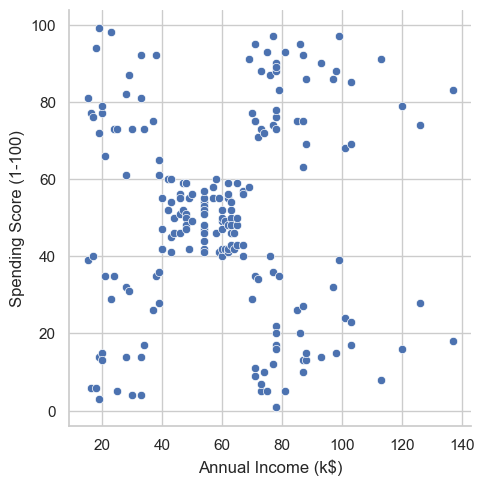

In [116]:
sns.relplot(x='Annual Income (k$)',y="Spending Score (1-100)",data=df1)

In [117]:
df1.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [142]:
from sklearn.cluster import KMeans
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df1[['Age','Spending Score (1-100)']])
    sse.append(km.inertia_)

C:\Users\Humaina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Humaina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Humaina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Humaina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

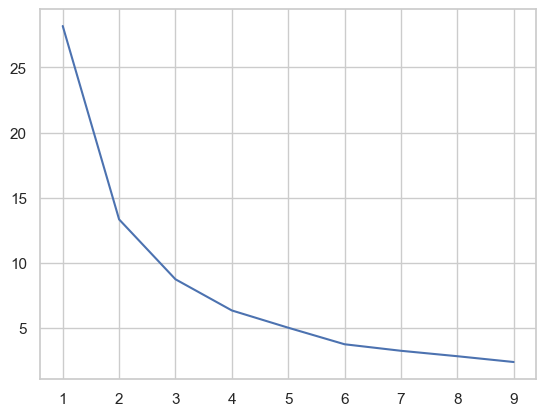

In [143]:
plt.plot(k_rng,sse)

In [120]:
km=KMeans(n_clusters=4)
y_predict=km.fit_predict(df1[['Age','Spending Score (1-100)']])
df1['cluster']=y_predict

C:\Users\Humaina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Humaina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [121]:
df1

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,1
1,Male,21,15,81,0
2,Female,20,16,6,2
3,Female,23,16,77,0
4,Female,31,17,40,1
...,...,...,...,...,...
195,Female,35,120,79,0
196,Female,45,126,28,2
197,Male,32,126,74,0
198,Male,32,137,18,2


In [122]:
c0=df1[df1.cluster==0]
c1=df1[df1.cluster==1]
c2=df1[df1.cluster==2]
c3=df1[df1.cluster==3]

In [123]:
km.cluster_centers_

array([[30.1754386 , 82.35087719],
       [27.61702128, 49.14893617],
       [43.29166667, 15.02083333],
       [55.70833333, 48.22916667]])

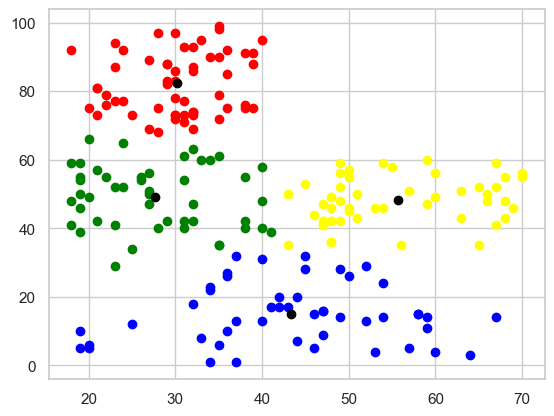

In [130]:
plt.scatter(c0.Age,c0['Spending Score (1-100)'],color='red')
plt.scatter(c1.Age,c1['Spending Score (1-100)'],color='green')
plt.scatter(c2.Age,c2['Spending Score (1-100)'],color='blue')
plt.scatter(c3.Age,c3['Spending Score (1-100)'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black')

In [131]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df1[['Age']])
df1['Age']=scaler.transform(df1[['Age']])

In [132]:
scaler.fit(df1[['Spending Score (1-100)']])
df1['Spending Score (1-100)']=scaler.transform(df1[['Spending Score (1-100)']])

In [133]:
df1

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,0.019231,15,0.387755,1
1,Male,0.057692,15,0.816327,0
2,Female,0.038462,16,0.051020,2
3,Female,0.096154,16,0.775510,0
4,Female,0.250000,17,0.397959,1
...,...,...,...,...,...
195,Female,0.326923,120,0.795918,0
196,Female,0.519231,126,0.275510,2
197,Male,0.269231,126,0.744898,0
198,Male,0.269231,137,0.173469,2


In [134]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df1[['Age','Spending Score (1-100)']])
    sse.append(km.inertia_)

C:\Users\Humaina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Humaina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Humaina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Humaina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

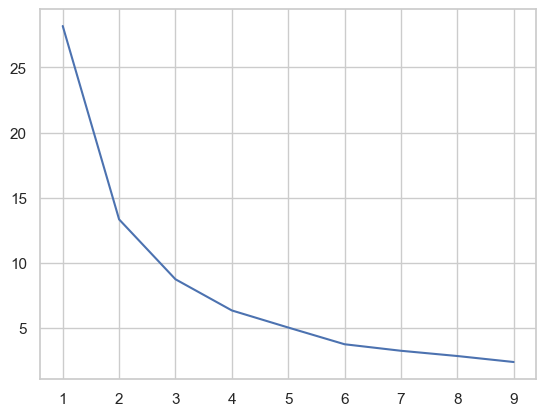

In [135]:
plt.plot(k_rng,sse)

In [144]:
km=KMeans(n_clusters=4)
y_predict=km.fit_predict(df1[['Age','Spending Score (1-100)']])
df1['cluster']=y_predict

C:\Users\Humaina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Humaina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [145]:
df1

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,0.019231,15,0.387755,3
1,Male,0.057692,15,0.816327,0
2,Female,0.038462,16,0.051020,3
3,Female,0.096154,16,0.775510,0
4,Female,0.250000,17,0.397959,3
...,...,...,...,...,...
195,Female,0.326923,120,0.795918,0
196,Female,0.519231,126,0.275510,1
197,Male,0.269231,126,0.744898,0
198,Male,0.269231,137,0.173469,3


In [146]:
c0=df1[df1.cluster==0]
c1=df1[df1.cluster==1]
c2=df1[df1.cluster==2]
c3=df1[df1.cluster==3]

In [147]:
km.cluster_centers_

array([[0.23639053, 0.80423862],
       [0.56933198, 0.14285714],
       [0.73036007, 0.48480243],
       [0.17730769, 0.39836735]])

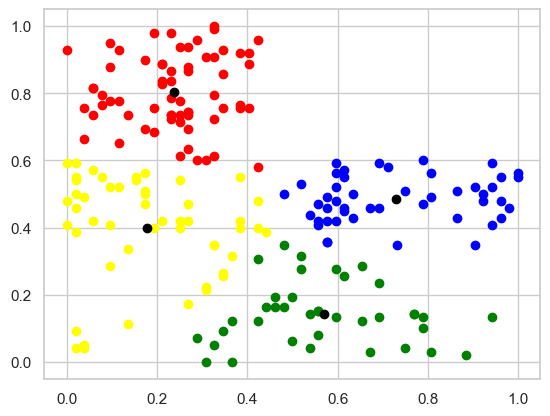

In [149]:
plt.scatter(c0.Age,c0['Spending Score (1-100)'],color='red')
plt.scatter(c1.Age,c1['Spending Score (1-100)'],color='green')
plt.scatter(c2.Age,c2['Spending Score (1-100)'],color='blue')
plt.scatter(c3.Age,c3['Spending Score (1-100)'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black')